In [1]:
print("Hello in the Project of 'Penalty Predictions' Made by Kacper and Julia")

Hello in the Project of Penalty Predictions Made by Kacper and Julia


In [3]:
import cv2
import os
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt


In [15]:
# przerobka filmikow na kaltki

input_folder = r'C:\Users\user\Desktop\studia\Widzenie Komputerowe Projekt\Predykcja_Karnych\dataset\karne'
output_folder = r'C:\Users\user\Desktop\studia\Widzenie Komputerowe Projekt\Predykcja_Karnych\dataset\karne_przerobione'

# Tworzenie głównego katalogu na wszystkie klatki
os.makedirs(output_folder, exist_ok=True)

# Iteracja po wszystkich plikach w folderze
for video_file in os.listdir(input_folder):
    video_path = os.path.join(input_folder, video_file)
    
    
    print(f'Przetwarzanie: {video_file}')
    
    # Tworzenie podfolderu na klatki dla danego filmu
    video_output_folder = os.path.join(output_folder, os.path.splitext(video_file)[0])
    os.makedirs(video_output_folder, exist_ok=True)
    
    # Wczytanie wideo
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # zmiana rozmiaru na 224
        resized_frame = cv2.resize(frame, (1080, 720))
        
        # Zapis klatki do podfolderu
        frame_filename = os.path.join(video_output_folder, f'frame_{frame_count:04d}.jpg')
        cv2.imwrite(frame_filename, resized_frame)
        
        frame_count += 1
    
    cap.release()
    print(f'Zapisano {frame_count} klatek dla {video_file} w folderze {video_output_folder}')

print('Przetwarzanie wszystkich filmów zakończone.')


Przetwarzanie: k1.mp4
Zapisano 143 klatek dla k1.mp4 w folderze C:\Users\user\Desktop\studia\Widzenie Komputerowe Projekt\Predykcja_Karnych\dataset\karne_przerobione\k1
Przetwarzanie: k10.mp4
Zapisano 129 klatek dla k10.mp4 w folderze C:\Users\user\Desktop\studia\Widzenie Komputerowe Projekt\Predykcja_Karnych\dataset\karne_przerobione\k10
Przetwarzanie: k11.mp4
Zapisano 232 klatek dla k11.mp4 w folderze C:\Users\user\Desktop\studia\Widzenie Komputerowe Projekt\Predykcja_Karnych\dataset\karne_przerobione\k11
Przetwarzanie: k12.mp4
Zapisano 129 klatek dla k12.mp4 w folderze C:\Users\user\Desktop\studia\Widzenie Komputerowe Projekt\Predykcja_Karnych\dataset\karne_przerobione\k12
Przetwarzanie: k2.mp4
Zapisano 202 klatek dla k2.mp4 w folderze C:\Users\user\Desktop\studia\Widzenie Komputerowe Projekt\Predykcja_Karnych\dataset\karne_przerobione\k2
Przetwarzanie: k3.mp4
Zapisano 217 klatek dla k3.mp4 w folderze C:\Users\user\Desktop\studia\Widzenie Komputerowe Projekt\Predykcja_Karnych\datase


image 1/1 C:\Users\user\Desktop\studia\Widzenie Komputerowe Projekt\Predykcja_Karnych\dataset\karne_przerobione\k3\frame_0123.jpg: 448x640 2 persons, 1 sports ball, 36.4ms
Speed: 2.5ms preprocess, 36.4ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


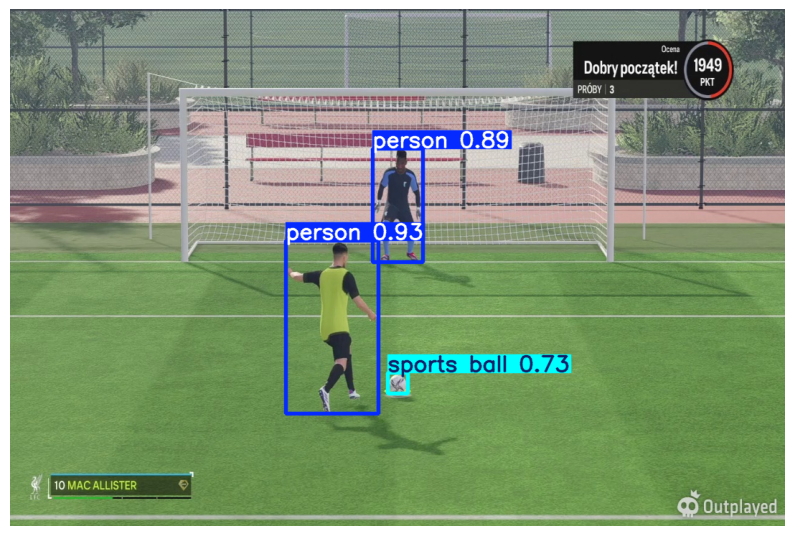

tensor([384.0312, 322.0856, 513.6962, 563.5911,   0.9279,   0.0000])
tensor([505.5063, 194.5281, 575.6502, 352.0748,   0.8929,   0.0000])
tensor([526.0955, 506.7848, 554.5871, 535.4896,   0.7255,  32.0000])


In [22]:

# Wczytaj obrazek
image_path = r'C:\Users\user\Desktop\studia\Widzenie Komputerowe Projekt\Predykcja_Karnych\dataset\karne_przerobione\k3\frame_0123.jpg'
image = cv2.imread(image_path)

# Załaduj model YOLOv8 (nano, szybki model)
model = YOLO('yolov8n.pt')  # Zmieniaj na 'yolov8m.pt' lub 'yolov8l.pt' dla lepszej precyzji

# Wykonaj detekcję
results = model(image_path)

# Wyświetl wyniki na obrazku
annotated_image = results[0].plot()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Zapisz wykryte koordynaty
for box in results[0].boxes.data:
    print(box)  # Format: [x1, y1, x2, y2, confidence, class]
